# Orthogonal Convolutions

The aim of this notebook is to present the main results of the paper: "Long range integration in neural networks with orthogonal convolutions".

It is divided in three main sections corresponding to the three main experiments studied in the paper.
- CIFAR-10
- Receptive fields
- Pathfinder

In each section, the user can load a pre-trained model and evaluate its performance.
A few of the models showed in the paper are available in this repository, one for each set of parameters.
This notebook is intended be used for evaluation only, not for training. 

Note that the code runs on GPU.

CHECK THIS. Please not that the orthogonal convolution cycle is defined expicitly for the cifar models, this means that printing the mode.summary() you can observe the sequence of convolution and permutations; for the pathfinder models, instead, the cycles was wrapped in the "NetXCycle" layer for tidiness. The cifar model were defined explicitly to allow the sensitivity maps to investigate more in detail the receptive field beavhoir at the different stages of the network.

### Imports and setting up the environement

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from BilinearInterpolate3D import BilinearInterpolate3D
from OrthogonalConv import NetXCycle
from utils import *
from saliency import *

W0217 17:35:20.566132 140136620279616 deprecation_wrapper.py:119] From /tf/notebooks/sumbission-ICML/KJHYgfOhas/ICML-Submission/OrthogonalConv.py:4: The name tf.keras.initializers.RandomUniform is deprecated. Please use tf.compat.v1.keras.initializers.RandomUniform instead.



In [3]:
# Setting a GPU memory fraction used (if desired) to limit resource usage
gpu_memory_fraction = 0.4
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [4]:
# Set larger batch size to speed up evaluation times, or smaller to avoid OOM issues.
BATCH_SIZE = 64

## CIFAR-10

- Load dataset
- Load model
- Show model summary
- Evaluate model

In [6]:
# Set dataset path and load dataset
cifar_dataset_path = 'section_4.1/data/CIFAR-10_test.h5'
x_test, y_test = read_h5_dataset(cifar_dataset_path)

In [7]:
models = ["orthogonal", "baseline"]
depths = ["3", "6", "9", "12", "15", "18"]
# Set model path and load model
for model in models:
    for depth in depths:
        cifar_model_path = 'section_4.1/models/'+model+'_models/'+model+'_cifar10_depth'+depth+'.h5'
        cifar_model = load_model(cifar_model_path, custom_objects={'BilinearInterpolate3D': BilinearInterpolate3D})
        
        # Evaluating 
        scores = cifar_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
        print(cifar_model_path)
        print(scores)

W0217 17:17:46.146376 139839225567040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0217 17:17:46.146961 139839225567040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0217 17:17:46.150166 139839225567040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprec

10000/10000 [==============================] - 1s 120us/sample - loss: 1.4755 - acc: 0.4735
section_4.1/models/orthogonal_models/orthogonal_cifar10_depth3.h5
[1.4755000730514527, 0.4735]
10000/10000 [==============================] - 0s 45us/sample - loss: 1.0187 - acc: 0.6460
section_4.1/models/orthogonal_models/orthogonal_cifar10_depth6.h5
[1.0187474377632142, 0.646]
10000/10000 [==============================] - 1s 76us/sample - loss: 0.7619 - acc: 0.7590
section_4.1/models/orthogonal_models/orthogonal_cifar10_depth9.h5
[0.7618837498664855, 0.759]
10000/10000 [==============================] - 2s 157us/sample - loss: 0.5320 - acc: 0.8459
section_4.1/models/orthogonal_models/orthogonal_cifar10_depth12.h5
[0.5320310600280762, 0.8459]
10000/10000 [==============================] - 4s 367us/sample - loss: 0.4886 - acc: 0.8788
section_4.1/models/orthogonal_models/orthogonal_cifar10_depth15.h5
[0.4885569083213806, 0.8788]
10000/10000 [==============================] - 8s 831us/sample - lo

In [ ]:
cifar_model_path = 'section_4.1/models/orthogonal_models/orthogonal_cifar10_depth9.h5'
cifar_model = load_model(cifar_model_path, custom_objects={'BilinearInterpolate3D': BilinearInterpolate3D})

In [47]:
# Print model summary
cifar_model.summary()

In [48]:
# Evaluating 
scores = cifar_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

10000/10000 [==============================] - 1s 150us/sample - loss: 1.4755 - acc: 0.4735


## Receptive fields plots
- Load and scale a sample image
- Choose layer list and number of nodes to sample
- Plot receptive field

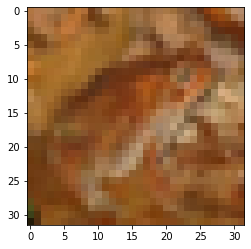

In [10]:
# Load and scale a sample image
image_index = np.random.randint(0, x_test.shape[0]-1)
image = x_test[image_index]
plt.imshow((image * NORMALIZING_CONST + CENTRALIZING_CONST)/QUANTIZATION_SIZE)

# ADD A BRIEF EXAMPLE THAT SAYS HOW TO COUNT LAYERS AND WHAT THEY MEAN

In [11]:
# Choose layer list and number of nodes to sample
no_of_nodes = 3
layer_list = [2, 70]   # Add instructions on which layer is being checked
saliency = get_saliency_maps_and_fitted_ellipses(cifar_model, layer_list, no_of_nodes, image)

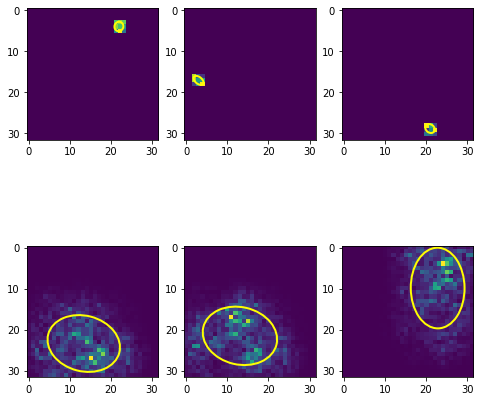

In [12]:
# Plot receptive field. If a node is deactivated, a blank image will be displayed.
print_images(*saliency)

# ADD LABELS AND DESCRIPTION OF THE IMAGES

## Receptive fields stats
- Choose a layer and number of nodes and images to sample.
- Compute and display receptive field statistics. Deactivated nodes do not participate in the statistics.

In [13]:
# Set variables controlling layer number, number of images, number of nodes and image indices.
layer = 42
no_of_images = 2
no_of_nodes = 2
image_indices = np.random.randint(0, x_test.shape[0]-1, size=no_of_images)

In [14]:
# Compute statistics 
sqrt_traces = get_saliency_stats(cifar_model, layer, no_of_nodes, x_test[image_indices])
print("Mean:", np.mean(sqrt_traces))
print("Std:", np.std(sqrt_traces))

Mean: 2.6519634851495795
Std: 0.15875380807346806


# ADD INTERPRETATION/EXPLANATION OF THE STATISTICS?

## Pathfinder

The orginal test dataset included 100000 images, following the test-training split of the original pathfinder paper [https://arxiv.org/pdf/1805.08315.pdf]. To prevent possible memory problems that the user my encounter while loading the data, here we provide a subset of 10000 random images of the test data employed for the evaluation. This number of samples should be sufficient for statistically significant evaluation. 

- Load dataset
- Load model from a directory
- (Optional) For large models of kernel size 20, run a script to untar and reconstruct the model.
- Load model
- Show model summary
- Evaluate model

In [5]:
pathfinder_dataset_path = 'section_4.5/data/pathfinder_path9_test.h5'
x_test, y_test = read_h5_dataset(pathfinder_dataset_path, scale = False)

In [6]:
# Specify dataset folder and load dataset
models = ["orthogonal", "baseline"]
pathfinders = ["6", "9", "14"]
kernels = ["4", "8", "12", "20"]
# Set model path and load model
for pathfinder in pathfinders:
    pathfinder_dataset_path = 'section_4.5/data/pathfinder_path'+pathfinder+'_test.h5'
    x_test, y_test = read_h5_dataset(pathfinder_dataset_path, scale = False)
    for model in models:
        for kernel in kernels:
            pathfinder_model_path = 'section_4.5/models/'+model+'_models/'+model+'_pathfinder'+pathfinder+'_kernelsize'+kernel
            if kernel=="20":
                !sh untar.sh $pathfinder_model_path
                a = !ls $pathfinder_model_path
                model = [i for i in a if i.find('.h5') != -1][0]
                pathfinder_model_path = pathfinder_model_path + '/' + model
            else:
                pathfinder_model_path += '.h5'
            
            # Load model
            pathfinder_model = load_model(pathfinder_model_path, custom_objects={'BilinearInterpolate3D':BilinearInterpolate3D,
                                                                                 'NetXCycle': NetXCycle})
            # Remove extracted model file if required
            if kernel=="20":
                !rm $pathfinder_model_path 
    
            # Evaluating 
            scores = pathfinder_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
            print(pathfinder_model_path)
            print(scores)

W0217 17:35:29.770341 140136620279616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0217 17:35:29.770952 140136620279616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0217 17:35:29.771546 140136620279616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

10000/10000 [==============================] - 19s 2ms/sample - loss: 0.2024 - acc: 0.9268
section_4.5/models/orthogonal_models/orthogonal_pathfinder6_kernelsize4.h5
[0.2023731444478035, 0.9268]
10000/10000 [==============================] - 23s 2ms/sample - loss: 0.1133 - acc: 0.9621
section_4.5/models/orthogonal_models/orthogonal_pathfinder6_kernelsize8.h5
[0.11334960912615061, 0.9621]
10000/10000 [==============================] - 29s 3ms/sample - loss: 0.1019 - acc: 0.9719
section_4.5/models/orthogonal_models/orthogonal_pathfinder6_kernelsize12.h5
[0.101897131652385, 0.9719]
orthogonal_pathfinder6_kernelsize20.h5
10000/10000 [==============================] - 52s 5ms/sample - loss: 0.0368 - acc: 0.9877
section_4.5/models/orthogonal_models/orthogonal_pathfinder6_kernelsize20/orthogonal_pathfinder6_kernelsize20.h5
[0.03684009488262236, 0.9877]
10000/10000 [==============================] - 16s 2ms/sample - loss: 19.6777 - acc: 0.4972
section_4.5/models/baseline_models/baseline_pathfi

In [7]:
# Specify the model path (either directory or h5 file) - no trailing `/` for kernel size 20, otherwise the .h5 file directly
pathfinder_model_path = 'section_4.5/models/orthogonal_models/orthogonal_pathfinder9_kernelsize20'

In [8]:
# Identify if the path given identifies a h5 file or a directory requiring untarring
# If untarring required, extract model and update model path to extracted h5 file
untar = not bool(pathfinder_model_path.find('.h5')+1)
if untar:
    !sh untar.sh $pathfinder_model_path
    a = !ls $pathfinder_model_path
    model = [i for i in a if i.find('.h5') != -1][0]
    pathfinder_model_path = pathfinder_model_path + '/' + model

orthogonal_pathfinder9_kernelsize20.h5


In [9]:
# Load model
pathfinder_model = load_model(pathfinder_model_path, custom_objects={'BilinearInterpolate3D':BilinearInterpolate3D,
                                                                     'NetXCycle': NetXCycle})
# Remove extracted model file if required
if untar:
    !rm $pathfinder_model_path

In [10]:
# Print model summary
pathfinder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     51328     
_________________________________________________________________
batch_normalization_v1 (Batc (None, 128, 128, 128)     512       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 128)     0         
_________________________________________________________________
net_x_cycle (NetXCycle)      (None, 128, 128, 128)     19662720  
_________________________________________________________________
global_max_pooling2d (Global (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0     

In [11]:
# Evaluating 
scores = pathfinder_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

10000/10000 [==============================] - 45s 4ms/sample - loss: 3.3627 - acc: 0.4966
